In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import glob

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [0]:
# !pip install opencv-python==3.4.2.16
# !pip install opencv-contrib-python==3.4.2.16

In [5]:
cv2.__version__

'3.4.2'

In [0]:
classes = []
for file in glob.glob("/content/drive/My Drive/VIP/NWPU-RESISC12/train/*"):
    classes.append(file)

In [7]:
classes

['/content/drive/My Drive/VIP/NWPU-RESISC12/train/island',
 '/content/drive/My Drive/VIP/NWPU-RESISC12/train/desert',
 '/content/drive/My Drive/VIP/NWPU-RESISC12/train/industrial_area',
 '/content/drive/My Drive/VIP/NWPU-RESISC12/train/beach',
 '/content/drive/My Drive/VIP/NWPU-RESISC12/train/farmland',
 '/content/drive/My Drive/VIP/NWPU-RESISC12/train/commercial_area',
 '/content/drive/My Drive/VIP/NWPU-RESISC12/train/forest',
 '/content/drive/My Drive/VIP/NWPU-RESISC12/train/lake',
 '/content/drive/My Drive/VIP/NWPU-RESISC12/train/mountain',
 '/content/drive/My Drive/VIP/NWPU-RESISC12/train/residential',
 '/content/drive/My Drive/VIP/NWPU-RESISC12/train/river',
 '/content/drive/My Drive/VIP/NWPU-RESISC12/train/wetland']

In [0]:
root=classes[0][:48]
for i in range(len(classes)):
    classes[i] = classes[i][48:]

In [9]:
classes

['island',
 'desert',
 'industrial_area',
 'beach',
 'farmland',
 'commercial_area',
 'forest',
 'lake',
 'mountain',
 'residential',
 'river',
 'wetland']

In [0]:
subclasses = []
for i in classes:
    temp_path = str(root)+str(i)+"/*"
    for file in glob.glob(temp_path):
        subclasses.append(file)

In [11]:
print(len(subclasses))

6600


In [12]:
subclasses[0]

'/content/drive/My Drive/VIP/NWPU-RESISC12/train/island/island_001.jpg'

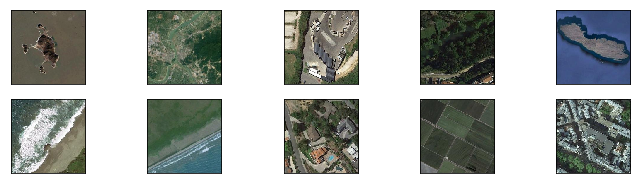

In [13]:

fig, axs = plt.subplots(2, 5, figsize=(12, 3))
fig.subplots_adjust(hspace = .2, wspace=.1)    # hspace and wspace defines the horizontal and vertical gap between subplots
axs = axs.ravel()                              # "unravel" these subplots into a "vector"
for i in range(10):
    rand_img = np.random.randint(low=0, high=str(len(subclasses)), size=1)
    temp_path = str(subclasses[rand_img[0]])
    img = cv2.imread(temp_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    axs[i].imshow(img)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    
plt.show()

In [0]:
def computeSIFT(th=0.1):
    imgs = []
    feat = []   
    counter = 0
    for i in subclasses:
        counter = counter+1
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        sift = cv2.xfeatures2d.SIFT_create(contrastThreshold=th)
        kps, des = sift.detectAndCompute(gray, None)
        if((des is None)==True):
            return("Loop")

        imgs.append(img)
        
        feat.append((kps, des))     # list contains a tuple of two arrays -- keypoint, descriptor
        if (counter%550==0):
            print('Computing SIFT for image'+str(i))   # some verbose
    return("Correct")

In [48]:
th = 0.1
while(True):
    th=th-0.001
    returned = computeSIFT(th)
    if (returned=="Correct"):
        break
    else:
        print('Threshold = '+str(th))

True
Threshold = 0.099
True
Threshold = 0.098
True
Threshold = 0.097
True
Threshold = 0.096
True
Threshold = 0.095
True
Threshold = 0.094
True
Threshold = 0.093
True
Threshold = 0.092
True
Threshold = 0.091
True
Threshold = 0.09
True
Threshold = 0.089
True
Threshold = 0.088
True
Threshold = 0.087
True
Threshold = 0.086
True
Threshold = 0.08499999999999999
True
Threshold = 0.08399999999999999
True
Threshold = 0.08299999999999999
True
Threshold = 0.08199999999999999
True
Threshold = 0.08099999999999999
True
Threshold = 0.07999999999999999
True
Threshold = 0.07899999999999999
True
Threshold = 0.07799999999999999
True
Threshold = 0.07699999999999999
True
Threshold = 0.07599999999999998
True
Threshold = 0.07499999999999998
True
Threshold = 0.07399999999999998
True
Threshold = 0.07299999999999998
True
Threshold = 0.07199999999999998
True
Threshold = 0.07099999999999998
True
Threshold = 0.06999999999999998
True
Threshold = 0.06899999999999998
True
Threshold = 0.06799999999999998
True
Threshol

In [49]:
test_classes = []
for file in glob.glob("/content/drive/My Drive/VIP/NWPU-RESISC12/test/*"):
    test_classes.append(file)

test_subclasses = []
for i in test_classes:
    temp_path = str(i)+"/*"
    for file in glob.glob(temp_path):
        test_subclasses.append(file)

print(len(test_subclasses))

1800


In [0]:
def computeSIFT_Test(th=0.1):
    imgs = []
    feat = []   
    counter = 0
    for i in test_subclasses:
        counter = counter+1
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        sift = cv2.xfeatures2d.SIFT_create(contrastThreshold=th)
        kps, des = sift.detectAndCompute(gray, None)
        if((des is None)==True):
            return("Loop")

        imgs.append(img)
        
        feat.append((kps, des))     # list contains a tuple of two arrays -- keypoint, descriptor
        if (counter%150==0):
            print('Computing SIFT for image'+str(i))   # some verbose
    return("Correct")

In [53]:
while(True):
    returned = computeSIFT_Test(th)
    if (returned=="Correct"):
        break
    else:
        print('Threshold = '+str(th))
    th=th-0.001

Computing SIFT for image/content/drive/My Drive/VIP/NWPU-RESISC12/test/beach/beach_699.jpg
Computing SIFT for image/content/drive/My Drive/VIP/NWPU-RESISC12/test/forest/forest_699.jpg
Computing SIFT for image/content/drive/My Drive/VIP/NWPU-RESISC12/test/industrial_area/industrial_area_700.jpg
Computing SIFT for image/content/drive/My Drive/VIP/NWPU-RESISC12/test/island/island_698.jpg
Computing SIFT for image/content/drive/My Drive/VIP/NWPU-RESISC12/test/mountain/mountain_700.jpg
Threshold = 0.023999999999999938
Computing SIFT for image/content/drive/My Drive/VIP/NWPU-RESISC12/test/beach/beach_699.jpg
Computing SIFT for image/content/drive/My Drive/VIP/NWPU-RESISC12/test/forest/forest_699.jpg
Computing SIFT for image/content/drive/My Drive/VIP/NWPU-RESISC12/test/industrial_area/industrial_area_700.jpg
Computing SIFT for image/content/drive/My Drive/VIP/NWPU-RESISC12/test/island/island_698.jpg
Computing SIFT for image/content/drive/My Drive/VIP/NWPU-RESISC12/test/mountain/mountain_700.j

In [54]:
imgs = []
feat = []   
counter = 0
for i in subclasses:
    counter = counter+1
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sift = cv2.xfeatures2d.SIFT_create(contrastThreshold=0.020999999999999935)
    kps, des = sift.detectAndCompute(gray, None)
    if((des is None)==True):
        print("Not working!")

    imgs.append(img)

    feat.append((kps, des))     # list contains a tuple of two arrays -- keypoint, descriptor
    if (counter%550==0):
        print('Computing SIFT for image'+str(i))   # some verbose

Computing SIFT for image/content/drive/My Drive/VIP/NWPU-RESISC12/train/island/island_548.jpg
Computing SIFT for image/content/drive/My Drive/VIP/NWPU-RESISC12/train/desert/desert_550.jpg
Computing SIFT for image/content/drive/My Drive/VIP/NWPU-RESISC12/train/industrial_area/industrial_area_550.jpg
Computing SIFT for image/content/drive/My Drive/VIP/NWPU-RESISC12/train/beach/beach_550.jpg
Computing SIFT for image/content/drive/My Drive/VIP/NWPU-RESISC12/train/farmland/farmland_550.jpg
Computing SIFT for image/content/drive/My Drive/VIP/NWPU-RESISC12/train/commercial_area/commercial_area_549.jpg
Computing SIFT for image/content/drive/My Drive/VIP/NWPU-RESISC12/train/forest/forest_550.jpg
Computing SIFT for image/content/drive/My Drive/VIP/NWPU-RESISC12/train/lake/lake_549.jpg
Computing SIFT for image/content/drive/My Drive/VIP/NWPU-RESISC12/train/mountain/mountain_547.jpg
Computing SIFT for image/content/drive/My Drive/VIP/NWPU-RESISC12/train/residential/residential_547.jpg
Computing SI

In [55]:
# since feat contain a list of tuples, a cool way to "unpack" or "unzip" a bunch of tuples into 
# separate lists is by using the zip function with an asterisk *
loc, des = list(zip(*feat))

# the single line above is similar to performing these two list comprehension operations
#loc = [item[0] for item in feat]
#des = [item[1] for item in feat]

# stack the lists of descriptors vertically (since descriptors are in rows)
alldes = np.vstack(des)
print(alldes.shape)

(6477986, 128)


In [56]:
import time
from scipy.cluster.vq import kmeans, vq

# k is the number of clusters
k = 50
alldes = np.float32(alldes)      # convert to float, required by kmeans and vq functions
e0 = time.time()
codebook, distortion = kmeans(alldes, k)
code, distortion = vq(alldes, codebook)
e1 = time.time()
print("Time to build {}-cluster codebook from {} images: {} seconds".format(k,alldes.shape[0],e1-e0))

Time to build 50-cluster codebook from 6477986 images: 18146.493411779404 seconds


In [58]:
print(str(root))

/content/drive/My Drive/VIP/NWPU-RESISC12/train/


In [0]:
import pickle

pickle.dump(codebook, open(str(root)+"codebook.pkl", "wb") )

In [0]:
import pickle

pickle.dump(codebook, open("codebook.pkl", "wb") )